## A Tutorial on Using Signver Signature Localizer Module 

In [1]:
from signver.detector import Detector
from signver.utils import data_utils, visualization_utils
from signver.utils.data_utils import invert_img
from signver.utils.visualization_utils import plot_np_array, visualize_boxes

import numpy as np
import tensorflow as tf

## Instantiate the Detector Module and Load a Model

In [2]:
model_path = "models/detector/ssd640fpnlite/saved_model"
detector = Detector()
detector.load(model_path)

## Download a Random Image and Invert It

In [3]:
file_url = "https://magazine.art21.org/wp-content/uploads/2009/06/signed-document-by-nam-june-paik-from-the-imas-historical-files.jpg"
file_url_2="https://swimmingfreestyle.net/wp-content/uploads/2019/10/contract-signature-page-example-new-elgin-munity-college-faculty-association-eccfa-of-contract-signature-page-example.png"
file_name = "signdoc.jpg" 
destination_dir = "data/test/localizer"
img_path = data_utils.download_file(file_url, file_name,  destination_dir) 

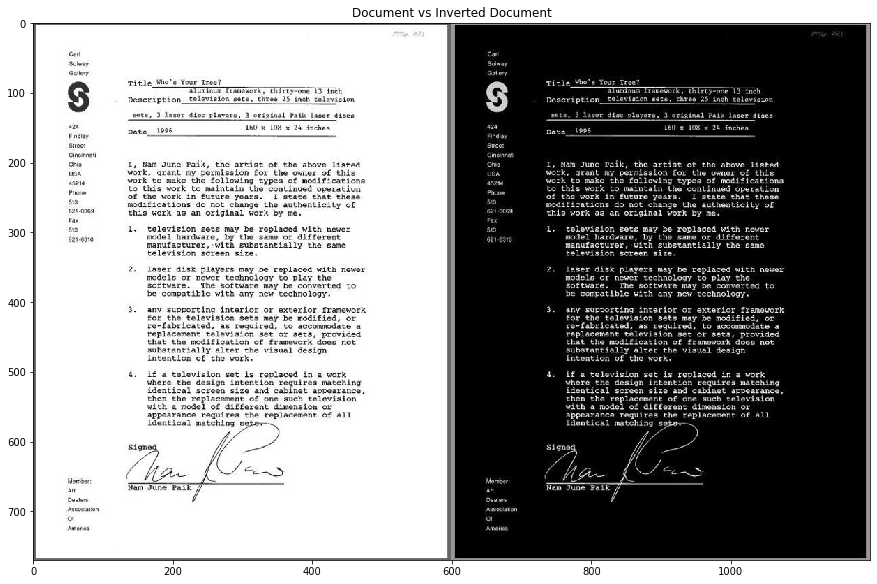

In [4]:
image_np = data_utils.img_to_np_array(img_path)
inverted_image_np = data_utils.invert_img(image_np) 

img_tensor = tf.convert_to_tensor(inverted_image_np)
img_tensor = img_tensor[tf.newaxis, ...]

plot_np_array( np.concatenate((image_np, inverted_image_np ), axis = 1), plot_title="Document vs Inverted Document")

## Get Localization Predictions on Inverted Image

In [5]:
boxes, scores, classes, detections = detector.detect(img_tensor)

## Visualize Signature Localization Predictions

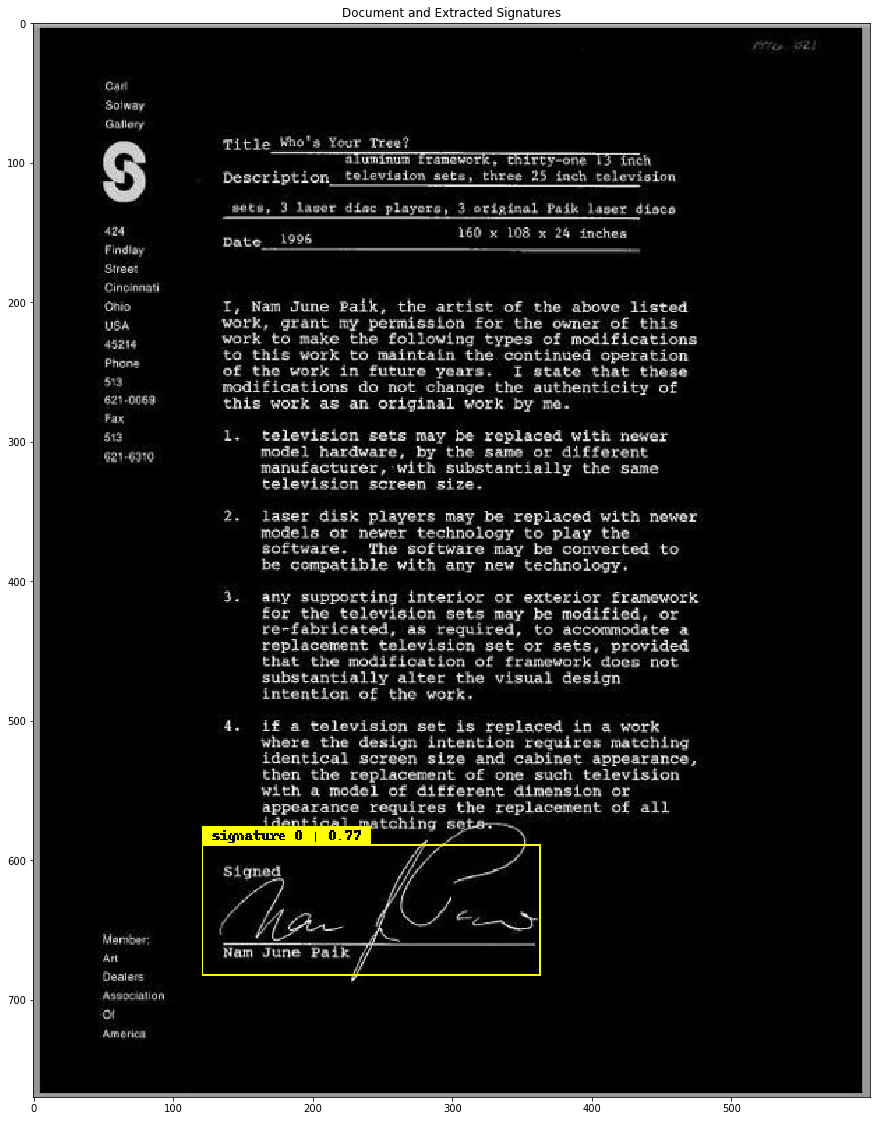

In [11]:
annotated_image = visualize_boxes(inverted_image_np, boxes, scores, threshold=0.5, color="yellow")
plot_np_array(annotated_image, plot_title="Document and Extracted Signatures")  

In [9]:
import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont


from signver.utils import data_utils


    


In [10]:
im_drawn = visualize_boxes(inverted_image_np, boxes, scores, color="green",  thickness=1)